In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt

## read csv to df

In [2]:
df = pd.read_csv('web-page-phishing.csv')
df.head()

,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_equal,n_at,n_and,n_exclamation,n_space,n_tilde,n_comma,n_plus,n_asterisk,n_hastag,n_dollar,n_percent,n_redirection,phishing
0,37,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,77,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,126,4,1,2,0,1,3,0,2,0,0,0,0,0,0,0,0,0,1,1
3,18,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,55,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


## Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100077 entries, 0 to 100076
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   url_length      100077 non-null  int64
 1   n_dots          100077 non-null  int64
 2   n_hypens        100077 non-null  int64
 3   n_underline     100077 non-null  int64
 4   n_slash         100077 non-null  int64
 5   n_questionmark  100077 non-null  int64
 6   n_equal         100077 non-null  int64
 7   n_at            100077 non-null  int64
 8   n_and           100077 non-null  int64
 9   n_exclamation   100077 non-null  int64
 10  n_space         100077 non-null  int64
 11  n_tilde         100077 non-null  int64
 12  n_comma         100077 non-null  int64
 13  n_plus          100077 non-null  int64
 14  n_asterisk      100077 non-null  int64
 15  n_hastag        100077 non-null  int64
 16  n_dollar        100077 non-null  int64
 17  n_percent       100077 non-null  int64
 18  n_re

### check for empty data

In [4]:
df.isna().sum()

url_length        0
n_dots            0
n_hypens          0
n_underline       0
n_slash           0
n_questionmark    0
n_equal           0
n_at              0
n_and             0
n_exclamation     0
n_space           0
n_tilde           0
n_comma           0
n_plus            0
n_asterisk        0
n_hastag          0
n_dollar          0
n_percent         0
n_redirection     0
phishing          0
dtype: int64

### Plot each feature against the label

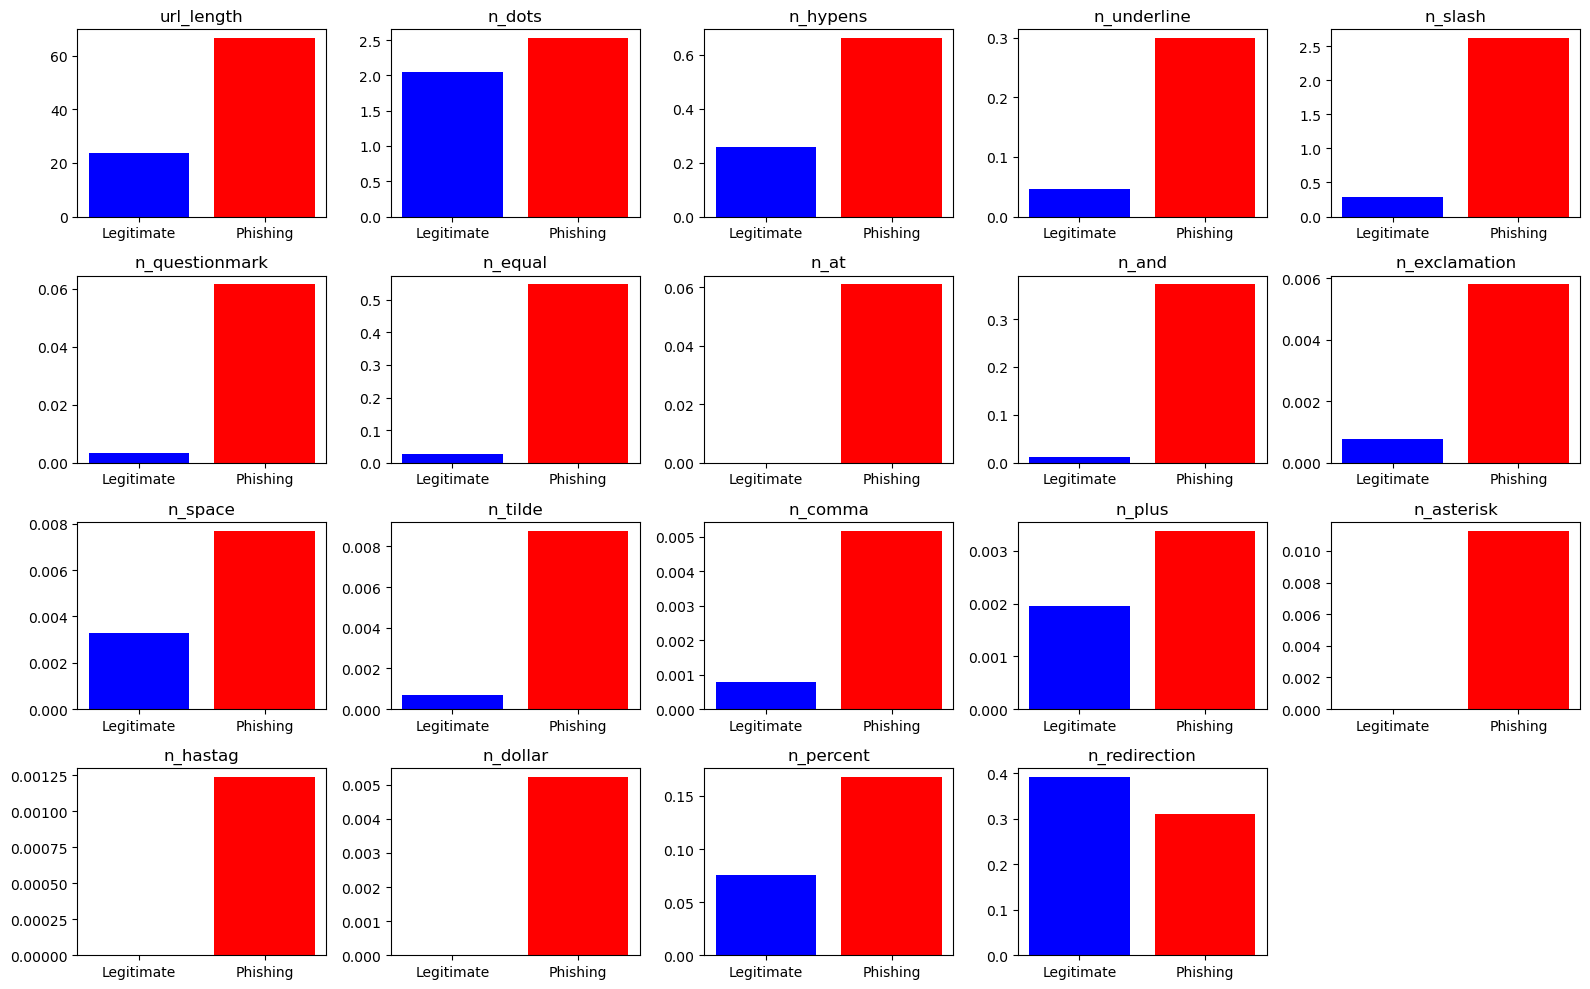

In [5]:
# Separate features and labels
features = df.drop('phishing', axis=1)
labels = df['phishing']

# Plot each feature against the label
plt.figure(figsize=(16, 10))

for i, col in enumerate(features.columns):
    plt.subplot(4, 5, i+1)
    plt.bar([0, 1], [features.loc[labels == 0, col].mean(), features.loc[labels == 1, col].mean()], color=['blue', 'red'])
    plt.xticks([0, 1], ['Legitimate', 'Phishing'])
    plt.title(col)

plt.tight_layout()
plt.show()

### Counting majority class and minority class

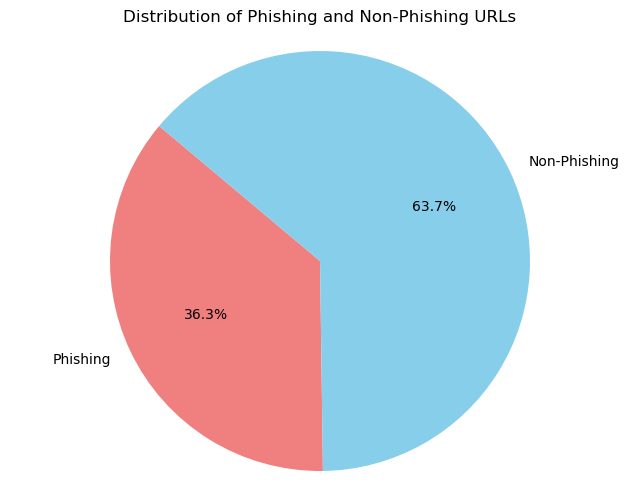

In [6]:
phishing_count = (df['phishing'] == 1).sum()
non_phishing_count = len(df) - phishing_count

labels = ['Phishing', 'Non-Phishing']
sizes = [phishing_count, non_phishing_count]
colors = ['lightcoral', 'skyblue']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
plt.title('Distribution of Phishing and Non-Phishing URLs')
plt.axis('equal') 
plt.show()

This dataset is imbalance.

### Give X equal to all features (Column 1-19)
### Give y equal to label (Column 20)

In [7]:
X = np.array(df.drop(columns="phishing"))
y = np.array(df["phishing"])

# Train Test Split

In [8]:
def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    
    # Shuffle the data index
    indexs = np.arange(len(X))
    np.random.shuffle(indexs)
    
    # Calculate the number of samples in the test set
    train_sample = int(1 - test_size * len(X))
    
    # Split the data into train and test sets
    X_train = X[:train_sample]
    y_train = y[:train_sample]
    X_test = X[train_sample:]
    y_test = y[train_sample:]
    
    return X_train, X_test, y_train, y_test

In [9]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

The data split into 80% training data
                    20% testing data

## The majority class in training set is higher than minority class

In [10]:
np.sum(y_train == 1)

29347

In [11]:
np.sum(y_train == 0)

50716

# Under sampling

### Randomly select data from the majority class to balance with the minority class.

In [12]:
minority_class = np.where(y_train == 1)[0]
majority_class = np.where(y_train == 0)[0]

#count the majority class and minority class
num_minority_samples = len(minority_class)
print("num_minority_samples:", num_minority_samples)
num_majority_samples = len(majority_class)
print("num_majority_samples:", num_majority_samples)

num_samples_to_keep = min(num_minority_samples, num_majority_samples)

#random select the majority class
undersampled_majority = np.random.choice(majority_class, size=num_samples_to_keep, replace=False)

undersampled = np.concatenate([undersampled_majority, minority_class])

np.random.shuffle(undersampled) #shuffle to remain random

X_train = X_train[undersampled]
y_train = y_train[undersampled]

num_minority_samples: 29347
num_majority_samples: 50716


In [13]:
np.sum(y_train == 1)

29347

In [14]:
np.sum(y_train == 0)

29347

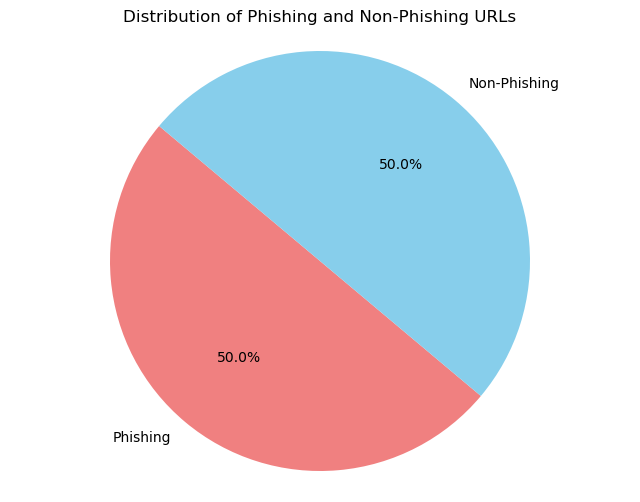

In [15]:
phishing_count = np.sum(y_train == 1)
non_phishing_count = np.sum(y_train == 0)

labels = ['Phishing', 'Non-Phishing']
sizes = [phishing_count, non_phishing_count]
colors = ['lightcoral', 'skyblue']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
plt.title('Distribution of Phishing and Non-Phishing URLs')
plt.axis('equal') 
plt.show()

The training set now balance.

# K-fold split

### Split the training data into k fold

In [16]:
def k_fold_split(data, k):
    fold_size = len(data) // k
    remainder = len(data) % k
    folds = []

    start = 0
    for i in range(k):
        if i < remainder:
            fold = data[start:start+fold_size+1]
            start += fold_size + 1
        else:
            fold = data[start:start+fold_size]
            start += fold_size
        folds.append(fold)

    return folds

### Each split in k fold will has 1 fold which is validation set
### Then calculate average accuracy on validation set and average accuracy on training set

In [17]:
avg_val_accuracies = []
avg_train_accuracies = []

k_values = range(1, 11)

for k in k_values:
    splits = k_fold_split(np.arange(len(X_train)), k)

    avg_val_accuracy = 0
    avg_train_accuracy = 0

    for fold_indices in splits:
        X_train_fold, X_val_fold = X_train[fold_indices], X_train[~fold_indices]
        y_train_fold, y_val_fold = y_train[fold_indices], y_train[~fold_indices]
        
        #model training
        svm_model = SVC()
        svm_model.fit(X_train_fold, y_train_fold)
        
        val_scores = svm_model.score(X_val_fold, y_val_fold)
        avg_val_accuracy += val_scores

        train_scores = svm_model.score(X_train_fold, y_train_fold)
        avg_train_accuracy += train_scores
    
    #find average score
    avg_val_accuracy /= k
    avg_train_accuracy /= k
    
    print("Average accuracy on validation set for", k, "fold:", avg_val_accuracy)
    print("Average accuracy on train set for", k, "fold:", avg_train_accuracy)
    
    avg_val_accuracies.append(avg_val_accuracy)
    avg_train_accuracies.append(avg_train_accuracy)

Average accuracy on validation set for 1 fold: 0.8476675639758748
Average accuracy on train set for 1 fold: 0.8476675639758748
Average accuracy on validation set for 2 fold: 0.8450608239343034
Average accuracy on train set for 2 fold: 0.8452311991004191
Average accuracy on validation set for 3 fold: 0.8419770164995138
Average accuracy on train set for 3 fold: 0.8420281647540543
Average accuracy on validation set for 4 fold: 0.8391998472056328
Average accuracy on train set for 4 fold: 0.8398644734899143
Average accuracy on validation set for 5 fold: 0.8384332640392268
Average accuracy on train set for 5 fold: 0.8386377093038423
Average accuracy on validation set for 6 fold: 0.8369168911958016
Average accuracy on train set for 6 fold: 0.8369169817591313
Average accuracy on validation set for 7 fold: 0.8355028058588551
Average accuracy on train set for 7 fold: 0.835792426513956
Average accuracy on validation set for 8 fold: 0.834207822510129
Average accuracy on train set for 8 fold: 0.834

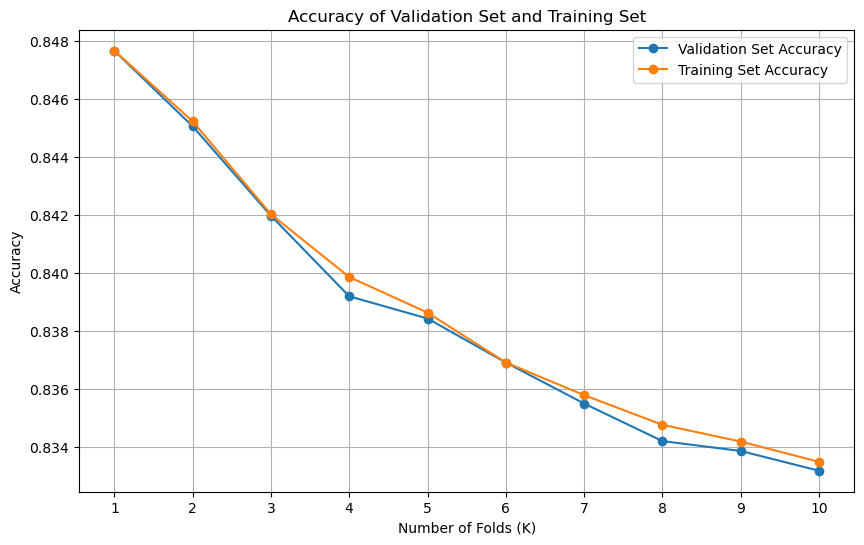

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, avg_val_accuracies, marker='o', label='Validation Set Accuracy')
plt.plot(k_values, avg_train_accuracies, marker='o', label='Training Set Accuracy')
plt.title('Accuracy of Validation Set and Training Set')
plt.xlabel('Number of Folds (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

# Finding best C parameter for SVM model

### Select k=3 from k-fold split to find best C parameter for SVM model

In [19]:
avg_val_accuracies = []
avg_train_accuracies = []

C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

k = 3  # Fixed value of k

splits = k_fold_split(np.arange(len(X_train)), k)

for C in C_values:
    avg_val_accuracy = 0
    avg_train_accuracy = 0

    for fold_indices in splits:
        X_train_fold, X_val_fold = X_train[fold_indices], X_train[~fold_indices]
        y_train_fold, y_val_fold = y_train[fold_indices], y_train[~fold_indices]
        
        #model training
        svm_model = SVC(C=C)
        svm_model.fit(X_train_fold, y_train_fold)
        
        val_scores = svm_model.score(X_val_fold, y_val_fold)
        avg_val_accuracy += val_scores

        train_scores = svm_model.score(X_train_fold, y_train_fold)
        avg_train_accuracy += train_scores
    
    #find average score
    avg_val_accuracy /= k
    avg_train_accuracy /= k
    
    print("Average accuracy on validation set for C =", C, ":", avg_val_accuracy)
    print("Average accuracy on train set for C =", C, ":", avg_train_accuracy)
    
    avg_val_accuracies.append(avg_val_accuracy)
    avg_train_accuracies.append(avg_train_accuracy)

Average accuracy on validation set for C = 0.001 : 0.7502811403599753
Average accuracy on train set for C = 0.001 : 0.7503323269317287
Average accuracy on validation set for C = 0.01 : 0.8070671092374458
Average accuracy on train set for C = 0.01 : 0.8068627557018669
Average accuracy on validation set for C = 0.1 : 0.82637060628055
Average accuracy on train set for C = 0.1 : 0.8264899539495024
Average accuracy on validation set for C = 1 : 0.8419770164995138
Average accuracy on train set for C = 1 : 0.8420281647540543
Average accuracy on validation set for C = 10 : 0.8539884822637197
Average accuracy on train set for C = 10 : 0.854823319417044
Average accuracy on validation set for C = 100 : 0.8671243736158886
Average accuracy on train set for C = 100 : 0.8685555633293053
Average accuracy on validation set for C = 1000 : 0.8712474598953323
Average accuracy on train set for C = 1000 : 0.8727979014846682


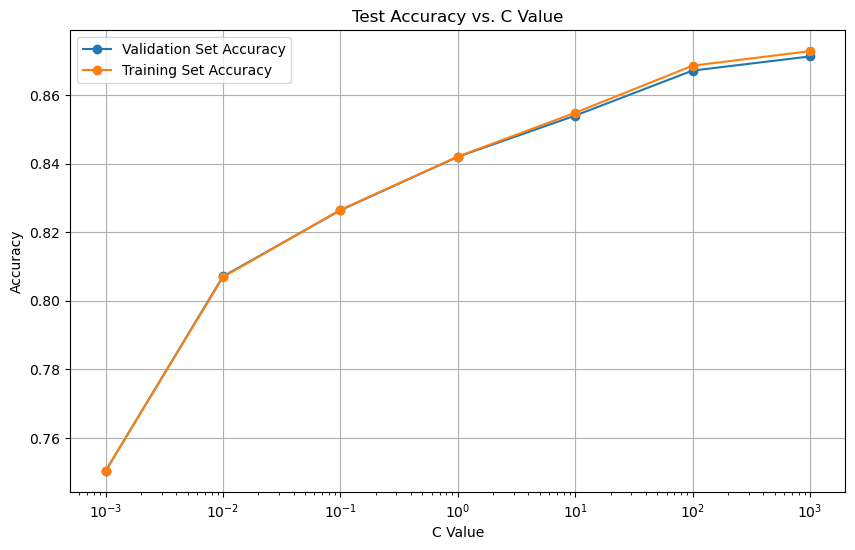

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(C_values, avg_val_accuracies, marker='o', label='Validation Set Accuracy')
plt.plot(C_values, avg_train_accuracies, marker='o', label='Training Set Accuracy')
plt.xscale('log')
plt.title('Test Accuracy vs. C Value')
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## Train SVM model with best C parameter and evaluate with testing set

In [21]:
#Evaluate on test set
svm_model = SVC(C=1000)

svm_model.fit(X_train, y_train)

test_accuracy = svm_model.score(X_test, y_test)
print("Accuracy on test set:", test_accuracy)

Accuracy on test set: 0.89717197961427


## Real example data prediction

In [22]:
"(Phishing) www.activate.facebook.fblogins.net/88adbao798283o8298398?login.asp"
predictions = svm_model.predict([[66, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
print("Predicted class:", predictions)

Predicted class: [1]


In [23]:
"(Phishing) www.micosoft.com/software/patches/fixit.exe"
predictions = svm_model.predict([[43, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
print("Predicted class:", predictions)

Predicted class: [1]


In [24]:
"(Not phishing) www.canva.com"
predictions = svm_model.predict([[13, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
print("Predicted class:", predictions)

Predicted class: [0]


In [25]:
"(Phishing) www.wellfargo.com:login@google.com"
predictions = svm_model.predict([[34, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
print("Predicted class:", predictions)

Predicted class: [1]
